# Лабораторна робота №2

#### Тема: Аналіз багатовимірного часового ряду

#### Виконали студенти груп КА-21 та КА-24 Акименко Валерія, Герман Вікторія, Жигалов Олександр, Людоговська Анна.

### _Імпортування бібліотек_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Project 1 - Weather Dataset.csv to Project 1 - Weather Dataset (1).csv


### _Завдання 1_

Посилання на часовий ряд: https://www.kaggle.com/datasets/rohitgrewal/weather-data

In [3]:
df_original = pd.read_csv(list(uploaded.keys())[0])
df_original.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Спостереження ведеться кожну годину з 01.01.2012 до 31.12.2012

Кількість записів: 8774

Кількість атрибутів: 8

Кількісні атрибути: Temp_C; Dew Point Temp_C; Rel Hum_%; Wind Speed_km/h; Visibility_km; Press_kPa

Якісні атрибути: Date/Time; Weather

### _Завдання 2_

In [4]:
def heatmap(val, cbar, desc):
    df_original['Date/Time'] = pd.to_datetime(df_original['Date/Time'])
    df_original['Month'] = df_original['Date/Time'].dt.month
    df_original['Hour'] = df_original['Date/Time'].dt.hour

    pivot = df_original.pivot_table(values=f'{val}', index='Hour', columns='Month', aggfunc='mean')

    plt.figure(figsize=(10, 5))
    sns.heatmap(pivot,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                cbar_kws={'label': f'{cbar}'})

    plt.title(f'Середня {desc} за годинами доби та місяцями')
    plt.xlabel('Місяць')
    plt.ylabel('Година')


    plt.xticks(ticks=[x + 0.5 for x in range(12)],
               labels=['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень'])

    plt.tight_layout()

Температура

In [5]:
print(f'Мінімальна температура: {float(df_original['Temp_C'].min())}\n'
      f'Максимальна температура: {float(df_original['Temp_C'].max())}\n'
      f'Середня температура: {float(df_original['Temp_C'].mean())}\n'
      f'Медіана температури: {float(df_original['Temp_C'].median())}')

Мінімальна температура: -23.3
Максимальна температура: 33.0
Середня температура: 8.798144353369764
Медіана температури: 9.3


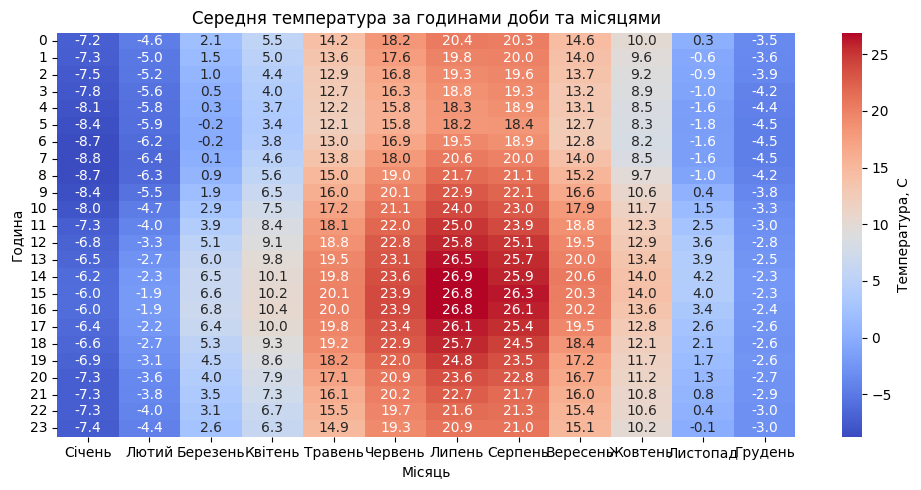

In [6]:
heatmap('Temp_C', 'Температура, C', 'температура')

Температура точки роси

In [7]:
print(f'Мінімальна температура точки роси: {float(df_original['Dew Point Temp_C'].min())}\n'
      f'Максимальна температура точки роси: {float(df_original['Dew Point Temp_C'].max())}\n'
      f'Середня температура точки роси: {float(df_original['Dew Point Temp_C'].mean())}\n'
      f'Медіана температури точки роси: {float(df_original['Dew Point Temp_C'].median())}')

Мінімальна температура точки роси: -28.5
Максимальна температура точки роси: 24.4
Середня температура точки роси: 2.5552937158469944
Медіана температури точки роси: 3.3


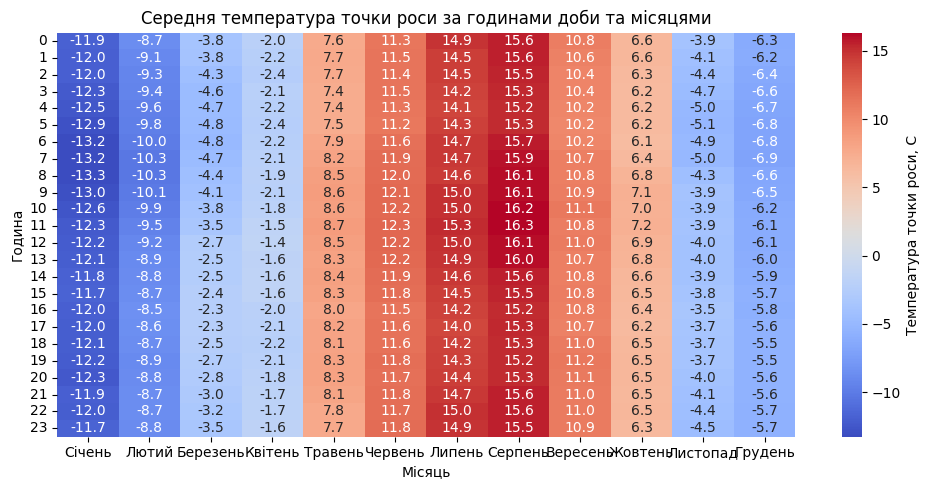

In [8]:
heatmap('Dew Point Temp_C', 'Температура точки роси, C', 'температура точки роси')

Вологість повітря

In [9]:
print(f'Мінімальна вологість повітря: {float(df_original['Rel Hum_%'].min())}\n'
      f'Максимальна вологість повітря: {float(df_original['Rel Hum_%'].max())}\n'
      f'Середня вологість повітря: {float(df_original['Rel Hum_%'].mean())}\n'
      f'Медіана вологості повітря: {float(df_original['Rel Hum_%'].median())}')

Мінімальна вологість повітря: 18.0
Максимальна вологість повітря: 100.0
Середня вологість повітря: 67.43169398907104
Медіана вологості повітря: 68.0


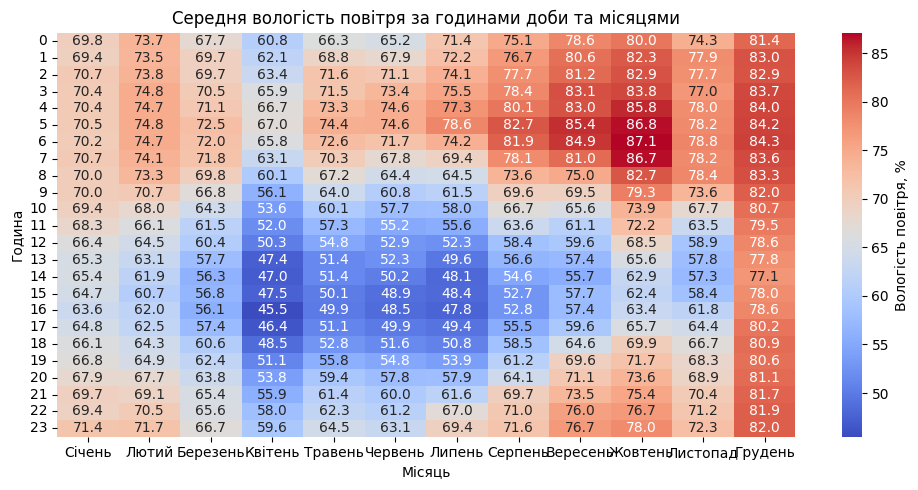

In [10]:
heatmap('Rel Hum_%', 'Вологість повітря, %', 'вологість повітря')

Швидкість повітря

In [11]:
print(f'Мінімальна швидкість повітря: {float(df_original['Wind Speed_km/h'].min())}\n'
      f'Максимальна швидкість повітря: {float(df_original['Wind Speed_km/h'].max())}\n'
      f'Середня швидкість повітря: {float(df_original['Wind Speed_km/h'].mean())}\n'
      f'Медіана швидкості повітря: {float(df_original['Wind Speed_km/h'].median())}')

Мінімальна швидкість повітря: 0.0
Максимальна швидкість повітря: 83.0
Середня швидкість повітря: 14.94546903460838
Медіана швидкості повітря: 13.0


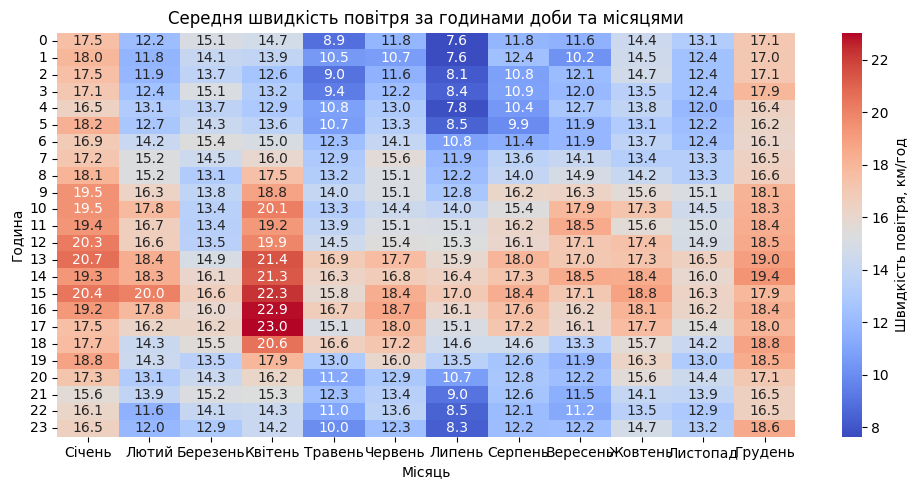

In [12]:
heatmap('Wind Speed_km/h', 'Швидкість повітря, км/год', 'швидкість повітря')

Видимість

In [13]:
print(f'Мінімальна видимість: {float(df_original['Visibility_km'].min())}\n'
      f'Максимальна видимість: {float(df_original['Visibility_km'].max())}\n'
      f'Середня видимість: {float(df_original['Visibility_km'].mean())}\n'
      f'Медіана видимості: {float(df_original['Visibility_km'].median())}')

Мінімальна видимість: 0.2
Максимальна видимість: 48.3
Середня видимість: 27.664446721311478
Медіана видимості: 25.0


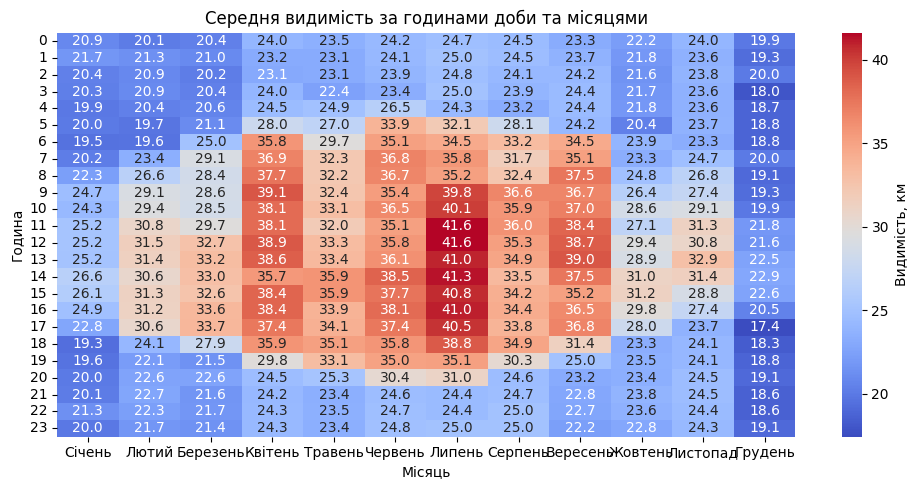

In [14]:
heatmap('Visibility_km', 'Видимість, км', 'видимість')

Атмосферний тиск

In [15]:
print(f'Мінімальний тиск: {float(df_original['Press_kPa'].min())}\n'
      f'Максимальний тиск: {float(df_original['Press_kPa'].max())}\n'
      f'Середній тиск: {float(df_original['Press_kPa'].mean())}\n'
      f'Медіана тиску: {float(df_original['Press_kPa'].median())}')

Мінімальний тиск: 97.52
Максимальний тиск: 103.65
Середній тиск: 101.05162340619307
Медіана тиску: 101.07


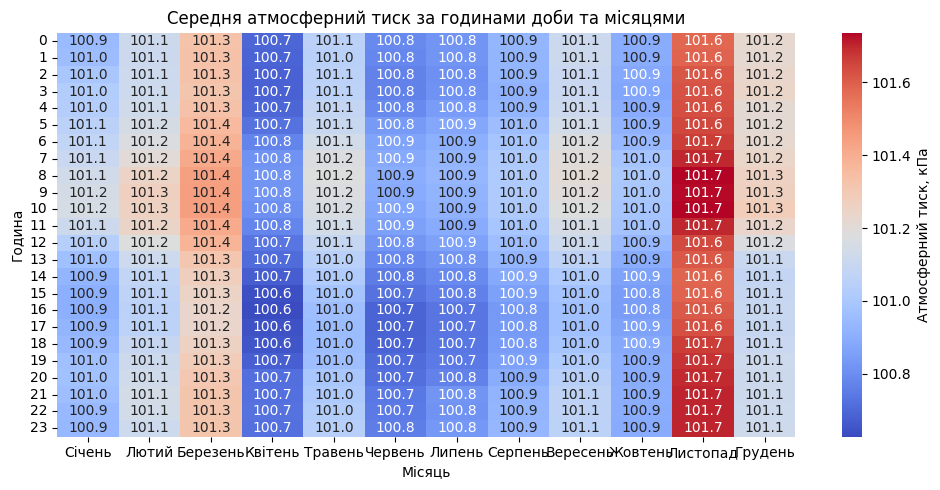

In [16]:
heatmap('Press_kPa', 'Атмосферний тиск, кПа', 'атмосферний тиск')

**Перевірки на пропуски**

In [17]:
print(f"Пропуски температур: {int(df_original['Temp_C'].isnull().sum())}\n"
      f"Пропуски температур точки роси: {int(df_original['Dew Point Temp_C'].isnull().sum())}\n"
      f"Пропуски вологості повітря: {int(df_original['Rel Hum_%'].isnull().sum())}\n"
      f"Пропуски швидкості повітря: {int(df_original['Wind Speed_km/h'].isnull().sum())}\n"
      f"Пропуски видимості: {int(df_original['Visibility_km'].isnull().sum())}\n"
      f"Пропуски атмосферного тиску: {int(df_original['Press_kPa'].isnull().sum())}\n")

Пропуски температур: 0
Пропуски температур точки роси: 0
Пропуски вологості повітря: 0
Пропуски швидкості повітря: 0
Пропуски видимості: 0
Пропуски атмосферного тиску: 0



У часовому ряді повністю відсутні пропуски. Заповнення не треба

### _Завдання 3_

Min-max нормалізація

In [18]:
num_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
df_minmax = df_original.copy()

for col in num_cols:
    x_min = df_original[col].min()
    x_max = df_original[col].max()
    df_minmax[col] = (df_original[col] - x_min) / (x_max - x_min)

df_minmax[num_cols]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,0.381883,0.465028,0.829268,0.048193,0.162162,0.606852
1,0.381883,0.468809,0.841463,0.048193,0.162162,0.606852
2,0.381883,0.474480,0.865854,0.084337,0.079002,0.610114
3,0.387211,0.478261,0.853659,0.072289,0.079002,0.611746
4,0.387211,0.476371,0.853659,0.084337,0.095634,0.605220
...,...,...,...,...,...,...
8779,0.415631,0.487713,0.768293,0.361446,0.197505,0.425775
8780,0.417407,0.493384,0.792683,0.289157,0.197505,0.409462
8781,0.404973,0.510397,0.914634,0.337349,0.095634,0.396411
8782,0.410302,0.504726,0.865854,0.337349,0.197505,0.389886


### _Завдання 4_

Перетворення якісних (категоріальних) характеристик у кількісні

In [19]:
df_cat = df_minmax.copy()

In [20]:
#Перевіряємо типи даних
df_cat.dtypes

,0
Date/Time,datetime64[ns]
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,float64
Wind Speed_km/h,float64
Visibility_km,float64
Press_kPa,float64
Weather,object
Month,int32
Hour,int32


In [21]:
#Перевірка результату
df_encoded = pd.get_dummies(df_cat, columns=["Weather"], drop_first=True)

In [23]:
df_encoded.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Month,Hour,Weather_Cloudy,...,"Weather_Snow,Fog","Weather_Snow,Haze","Weather_Snow,Ice Pellets",Weather_Thunderstorms,"Weather_Thunderstorms,Heavy Rain Showers","Weather_Thunderstorms,Moderate Rain Showers,Fog","Weather_Thunderstorms,Rain","Weather_Thunderstorms,Rain Showers","Weather_Thunderstorms,Rain Showers,Fog","Weather_Thunderstorms,Rain,Fog"
0,2012-01-01 00:00:00,0.381883,0.465028,0.829268,0.048193,0.162162,0.606852,1,0,False,...,False,False,False,False,False,False,False,False,False,False
1,2012-01-01 01:00:00,0.381883,0.468809,0.841463,0.048193,0.162162,0.606852,1,1,False,...,False,False,False,False,False,False,False,False,False,False
2,2012-01-01 02:00:00,0.381883,0.474480,0.865854,0.084337,0.079002,0.610114,1,2,False,...,False,False,False,False,False,False,False,False,False,False
3,2012-01-01 03:00:00,0.387211,0.478261,0.853659,0.072289,0.079002,0.611746,1,3,False,...,False,False,False,False,False,False,False,False,False,False
4,2012-01-01 04:00:00,0.387211,0.476371,0.853659,0.084337,0.095634,0.605220,1,4,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df_encoded.shape

(8784, 58)

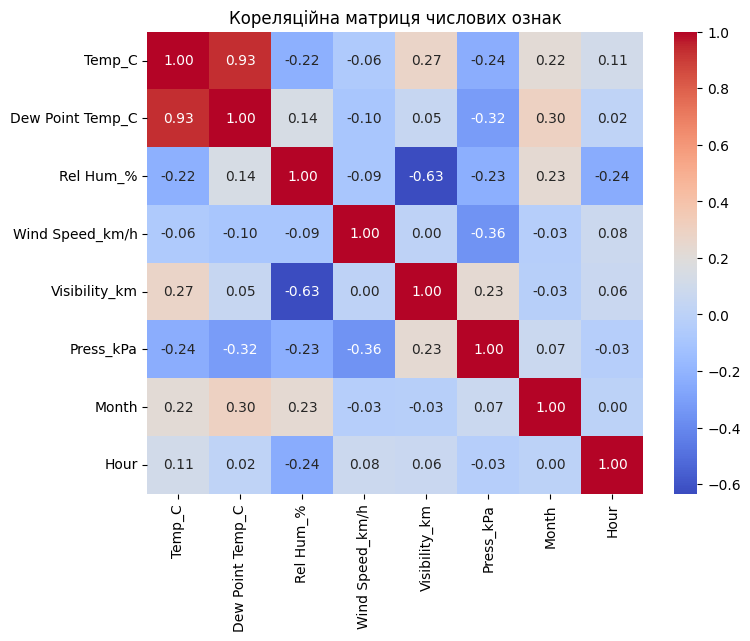

In [27]:
numeric_cols = [
    "Temp_C",
    "Dew Point Temp_C",
    "Rel Hum_%",
    "Wind Speed_km/h",
    "Visibility_km",
    "Press_kPa",
    "Month",
    "Hour"
]

plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[numeric_cols].corr(),
            annot=True,
            cmap="coolwarm",
            fmt=".2f")

plt.title("Кореляційна матриця числових ознак")
plt.show()

У наборі даних наявна категоріальна ознака Weather. Для її перетворення у числовий формат застосовано метод One-Hot Encoding, який створює окремі бінарні змінні для кожної категорії. Це забезпечує можливість подальшого використання даних у числових алгоритмах аналізу та моделювання.

### _Завдання 5_

Зменшення кількості атрибутів методом PCA (Principal Component Analysis)

In [30]:
# 0) Прибираємо datetime-колонки (PCA працює тільки з числовими)
df_for_pca = df_encoded.copy()

datetime_cols = df_for_pca.select_dtypes(include=["datetime64[ns]", "datetime64"]).columns
print("Datetime колонки, які видаляємо:", list(datetime_cols))

df_for_pca = df_for_pca.drop(columns=datetime_cols)

df_for_pca.dtypes.head()

Datetime колонки, які видаляємо: ['Date/Time']


,0
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,float64
Wind Speed_km/h,float64
Visibility_km,float64


In [31]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(df_for_pca)

print("Ознак до PCA:", df_for_pca.shape[1])
print("Компонент після PCA:", X_pca.shape[1])
print("Збережена дисперсія:", float(pca.explained_variance_ratio_.sum()))

df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca.head()

Ознак до PCA: 57
Компонент після PCA: 2
Збережена дисперсія: 0.9850867375749408


,PC1,PC2
0,-11.504903,-5.513880
1,-10.505031,-5.513581
2,-9.504582,-5.512849
3,-8.504531,-5.512802
4,-7.505343,-5.512920


Після застосування One-Hot Encoding кількість атрибутів зросла до 57. Для зменшення розмірності було застосовано метод головних компонент (PCA). У результаті простір ознак зменшено до 2 компонент при збереженні 98.5% сумарної дисперсії. Це свідчить про наявність значної кореляції між початковими ознаками та дозволяє суттєво зменшити розмірність даних без істотної втрати інформації.

Графік накопиченої дисперсії

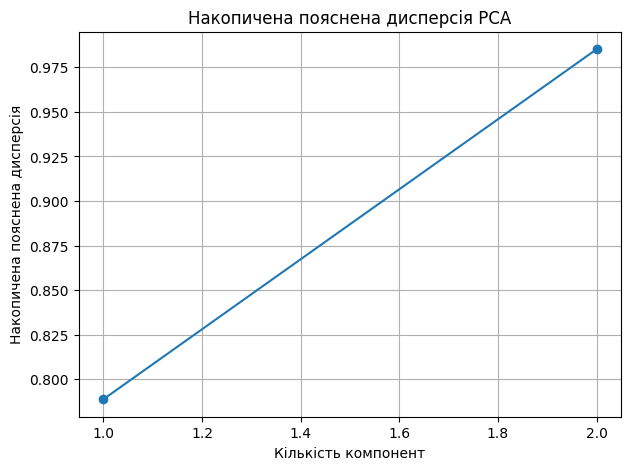

In [34]:
plt.figure(figsize=(7,5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_.cumsum(),
    marker='o'
)

plt.xlabel("Кількість компонент")
plt.ylabel("Накопичена пояснена дисперсія")
plt.title("Накопичена пояснена дисперсія PCA")
plt.grid()
plt.show()

З графіка накопиченої поясненої дисперсії видно, що перша головна компонента пояснює близько 79% дисперсії даних, а дві перші компоненти разом — понад 95%. Це свідчить про наявність сильної кореляції між ознаками та дозволяє ефективно зменшити розмірність даних до двох компонент без суттєвої втрати інформації.

### _Завдання 6_